In [1]:
import pandas as pd

customer_behavior = pd.read_csv('customer_behavior.csv')
customer_behavior

,session_count,avg_session_duration,pages_visited,total_spent,purchase_frequency,product_variety,return_rate,discount_usage,support_interactions,days_since_last_visit
0,23,5.177320,6.812728,169.605402,0,4,0.254682,25.505569,1,71
1,15,7.711826,9.651593,43.096426,4,3,0.070044,12.326525,0,51
2,21,7.692573,4.425673,69.103336,2,6,0.159048,8.753443,1,39
3,25,7.180291,4.205764,193.654437,3,2,0.046724,15.043512,2,28
4,15,12.488425,5.832801,156.666087,2,4,0.181730,27.168795,0,26
...,...,...,...,...,...,...,...,...,...,...
1020,2,67.241758,43.762529,4652.353630,9,24,0.750444,82.850945,13,294
1021,2,87.537480,35.842142,3784.391747,8,41,0.651045,96.570480,18,274
1022,2,58.326953,32.063522,4211.923165,9,33,0.906352,61.174652,10,367
1023,2,89.004955,20.883275,2400.843412,8,30,0.971165,92.065471,12,399


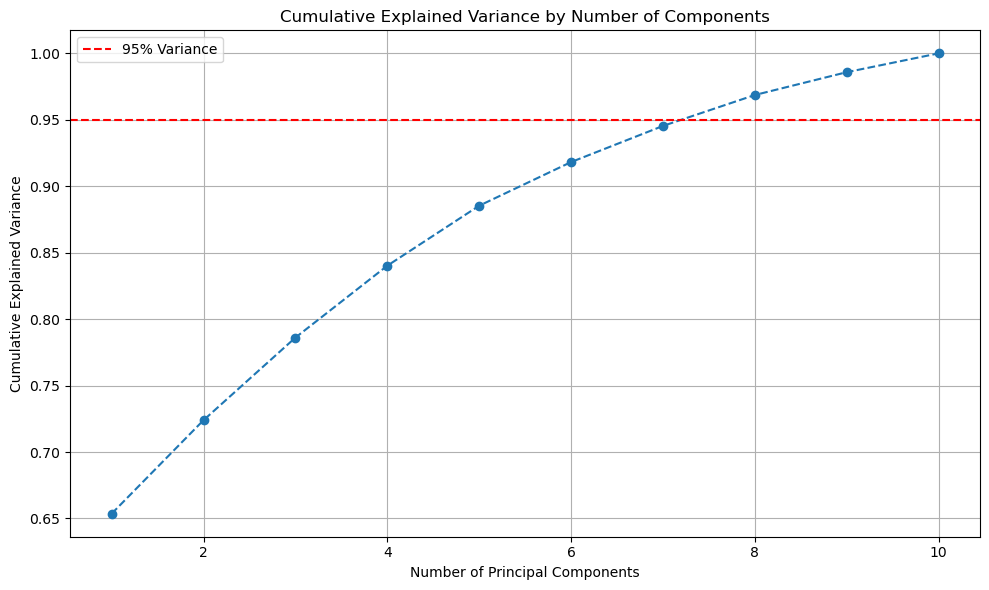

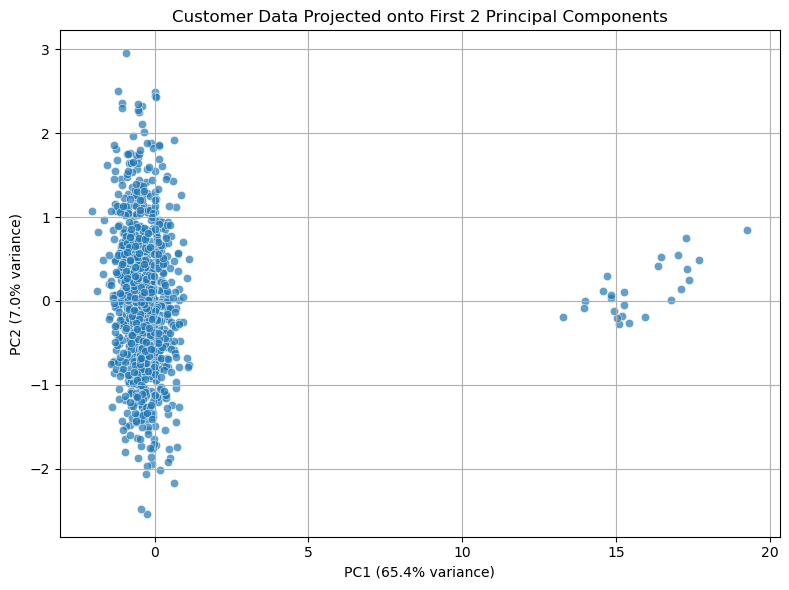

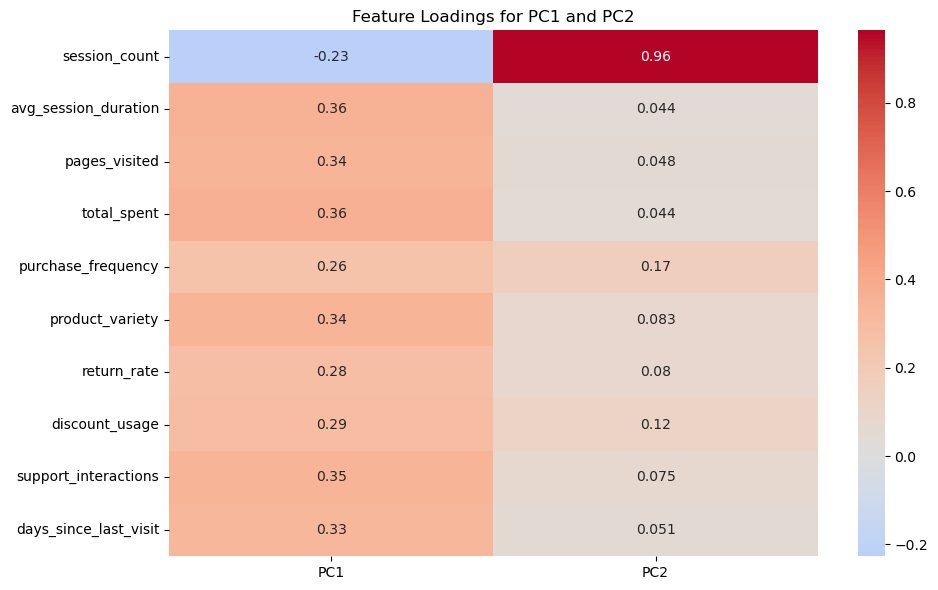

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
features = customer_behavior.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior[features])

# Step 2: Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Scree plot - Cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title("Cumulative Explained Variance by Number of Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_2d, columns=['PC1', 'PC2'])

# Step 5: 2D Scatter plot of projected data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title("Customer Data Projected onto First 2 Principal Components")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Plot feature loadings 
loading_matrix = pca_2d.components_.T
loading_df = pd.DataFrame(loading_matrix, index=features, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Loadings for PC1 and PC2")
plt.tight_layout()
plt.show()

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Text(0.5, 1.0, 'Customer Segmentation with K-Means')

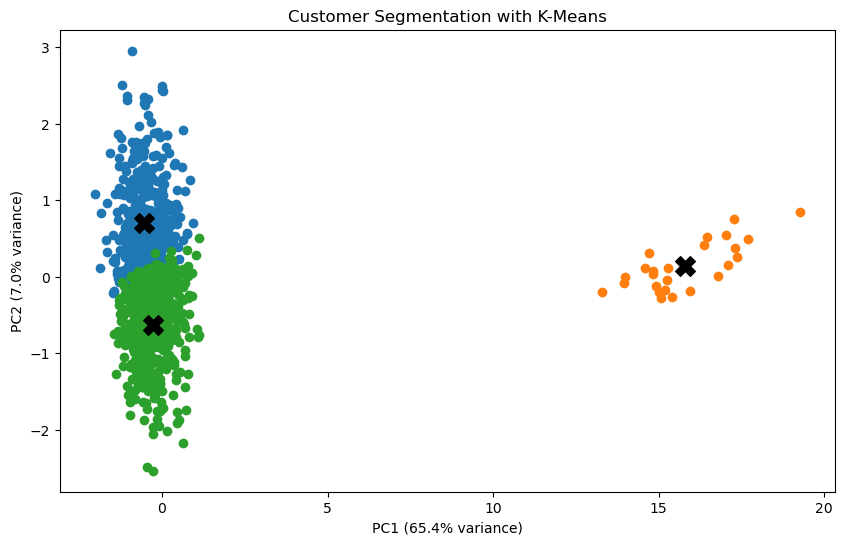

In [3]:
from sklearn.cluster import KMeans

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior)

# Step 2: Apply K-Means clustering
k = 3  # you can change this or use elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 3: Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Customer Segmentation with K-Means')


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

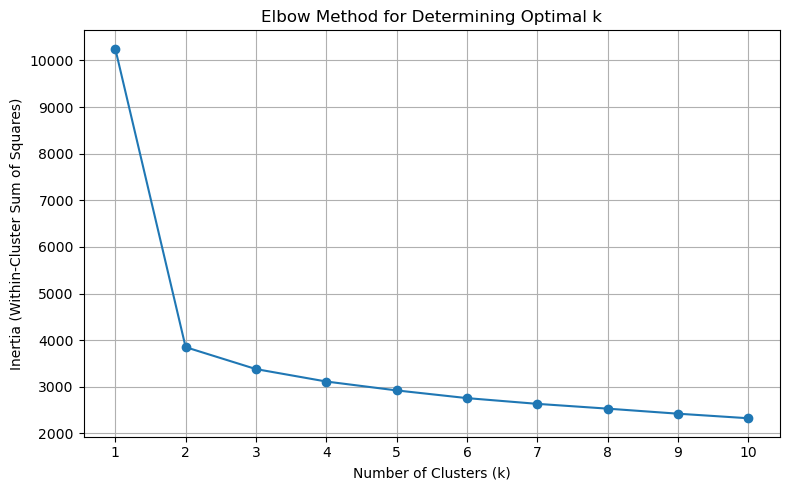

In [4]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 3: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

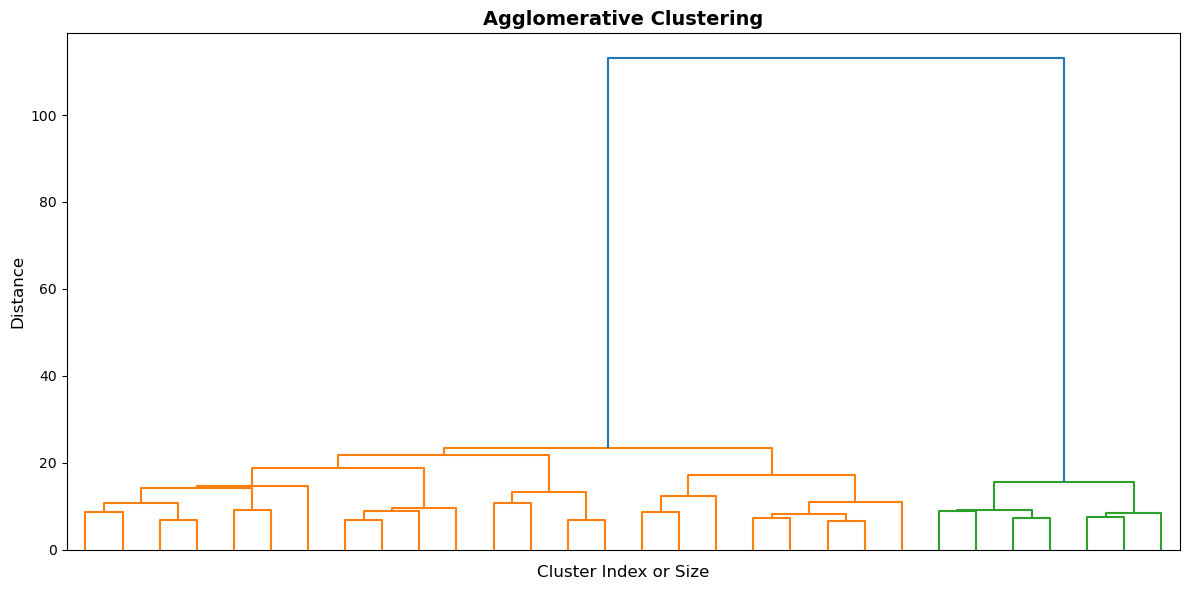

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior)

# Compute linkage matrix (Ward's method)
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    truncate_mode='lastp', 
    p=30,                
    color_threshold=None )

# Styling the plot
plt.title('Agglomerative Clustering', fontsize=14, weight='bold')
plt.xlabel('Cluster Index or Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white')  
plt.grid(False)                   

plt.tight_layout()
plt.show()


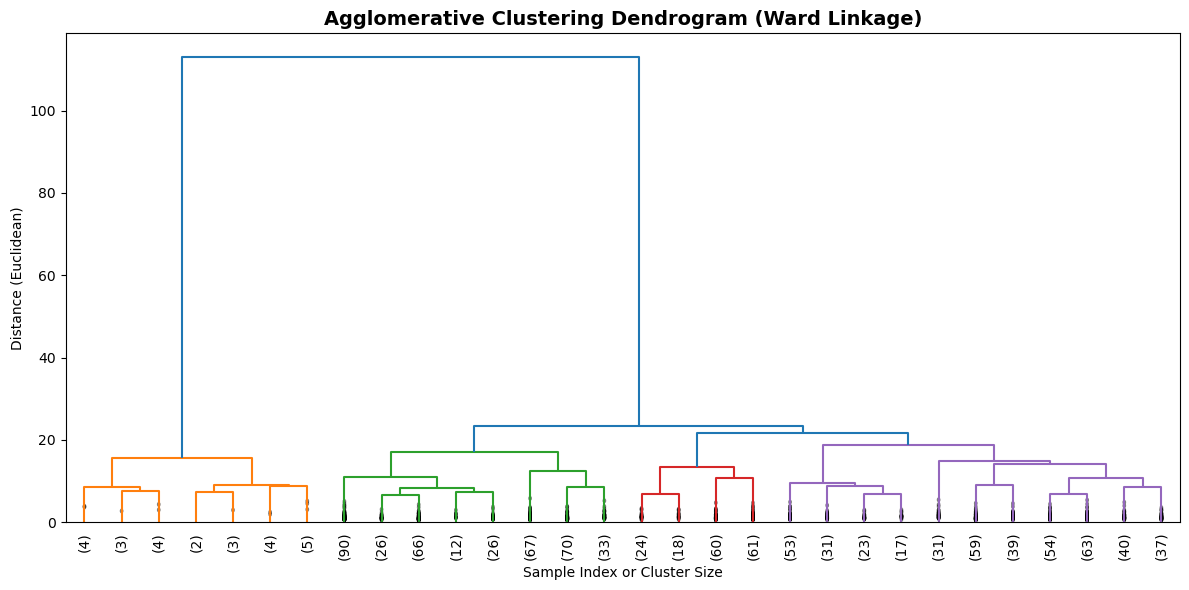

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    color_threshold=20  # You can adjust this value to highlight cluster splits
)

# Styling
plt.title('Agglomerative Clustering Dendrogram (Ward Linkage)', fontsize=14, weight='bold')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance (Euclidean)')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()


In [7]:
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(linked, t=3, criterion='maxclust')
customer_behavior['agglomerative_cluster'] = cluster_labels
customer_behavior

,session_count,avg_session_duration,pages_visited,total_spent,purchase_frequency,product_variety,return_rate,discount_usage,support_interactions,days_since_last_visit,agglomerative_cluster
0,23,5.177320,6.812728,169.605402,0,4,0.254682,25.505569,1,71,3
1,15,7.711826,9.651593,43.096426,4,3,0.070044,12.326525,0,51,2
2,21,7.692573,4.425673,69.103336,2,6,0.159048,8.753443,1,39,3
3,25,7.180291,4.205764,193.654437,3,2,0.046724,15.043512,2,28,3
4,15,12.488425,5.832801,156.666087,2,4,0.181730,27.168795,0,26,3
...,...,...,...,...,...,...,...,...,...,...,...
1020,2,67.241758,43.762529,4652.353630,9,24,0.750444,82.850945,13,294,1
1021,2,87.537480,35.842142,3784.391747,8,41,0.651045,96.570480,18,274,1
1022,2,58.326953,32.063522,4211.923165,9,33,0.906352,61.174652,10,367,1
1023,2,89.004955,20.883275,2400.843412,8,30,0.971165,92.065471,12,399,1


C:\Users\corne\AppData\Local\Temp\ipykernel_16664\2025790904.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


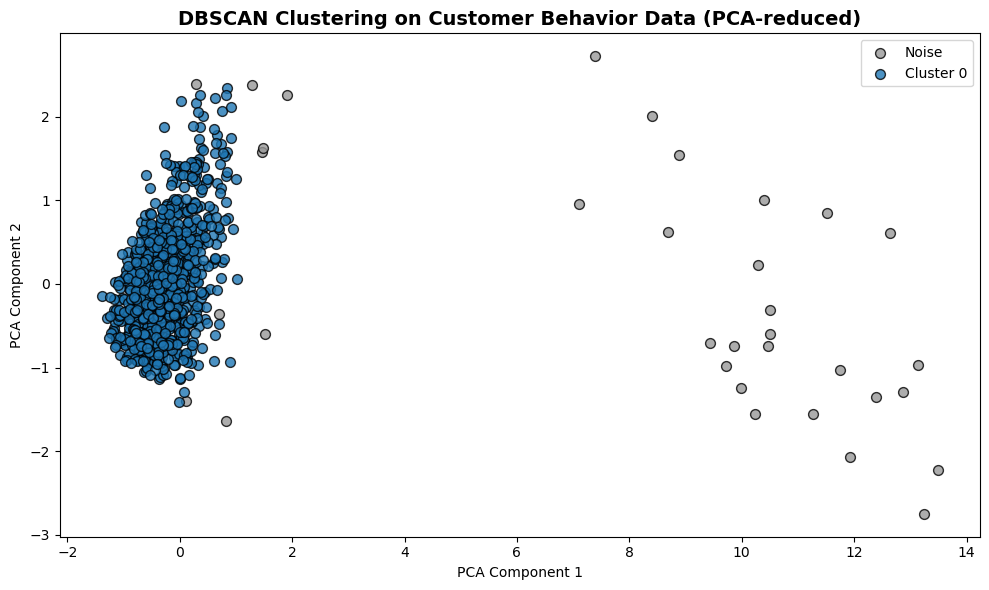

In [8]:
from sklearn.cluster import DBSCAN

#Step 0: Select few set of data
data = customer_behavior[['pages_visited', 'total_spent', 'return_rate', 'support_interactions']].copy()
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply DBSCAN
# You can tune eps and min_samples based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 3: Visualize the clustering results
# For visualization, reduce to 2D using PCA for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define colors (distinct + grey for noise)
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

plt.figure(figsize=(10, 6))
for label in unique_labels:
    is_noise = label == -1
    plt.scatter(
        X_pca[labels == label, 0],
        X_pca[labels == label, 1],
        s=50,
        c=[colors(label)] if not is_noise else ['#999999'],
        label=f'Cluster {label}' if not is_noise else 'Noise',
        edgecolor='k',
        alpha=0.8
    )

plt.title('DBSCAN Clustering on Customer Behavior Data (PCA-reduced)', fontsize=14, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


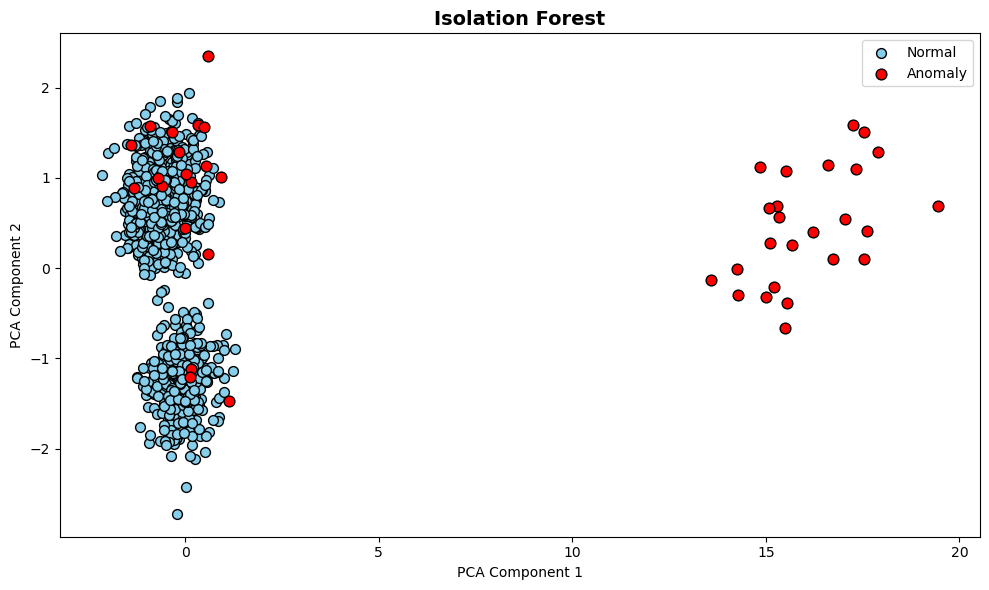

In [9]:
from sklearn.ensemble import IsolationForest
# Scale the data
X_scaled = StandardScaler().fit_transform(customer_behavior)

# Fit Isolation Forest
iso = IsolationForest(contamination='auto', random_state=42)
labels = iso.fit_predict(X_scaled)

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# 2D scatter plot of anomaly results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1],
            c='skyblue', edgecolor='k', s=50, label='Normal')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1],
            c='red', edgecolor='k', s=60, label='Anomaly')
plt.title('Isolation Forest', fontsize=14, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


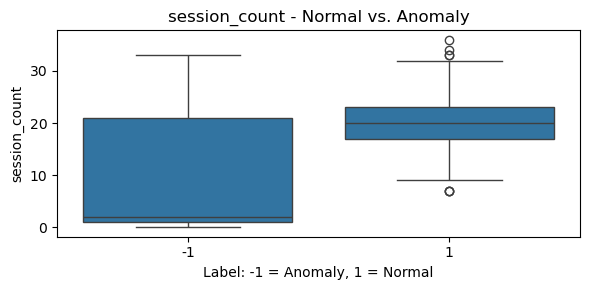

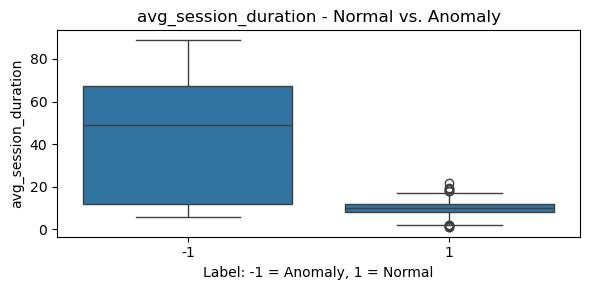

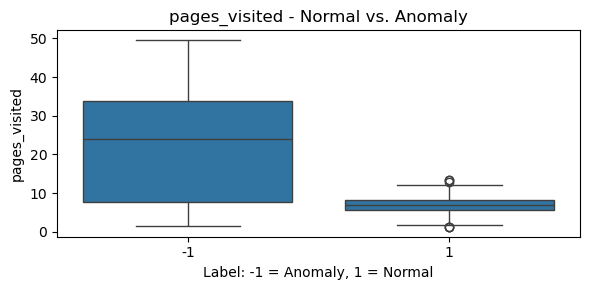

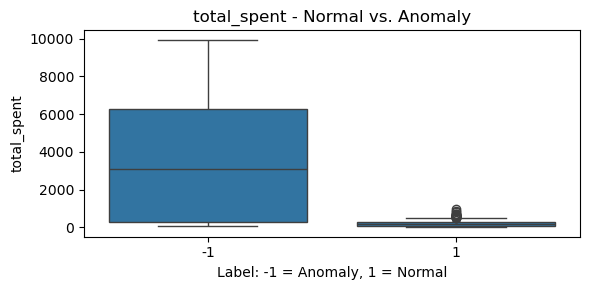

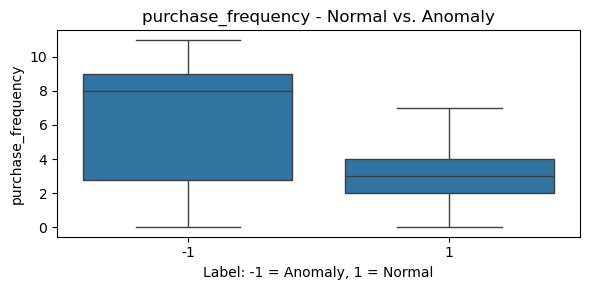

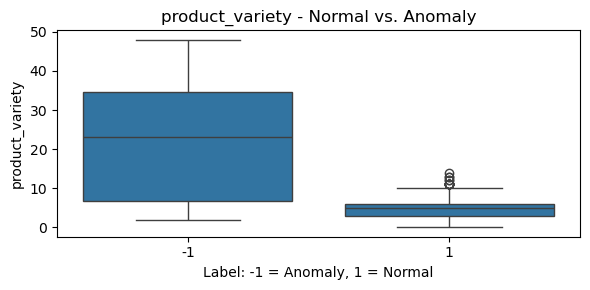

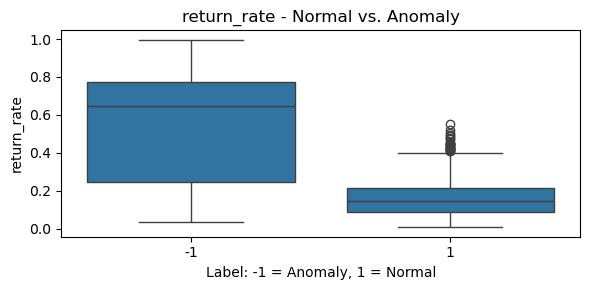

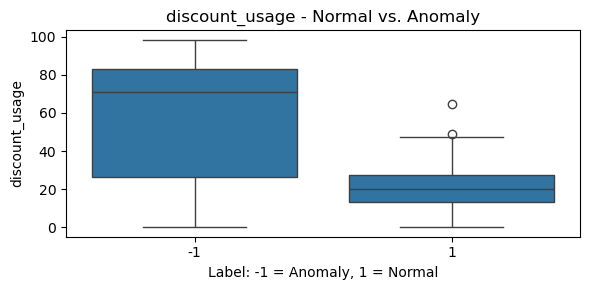

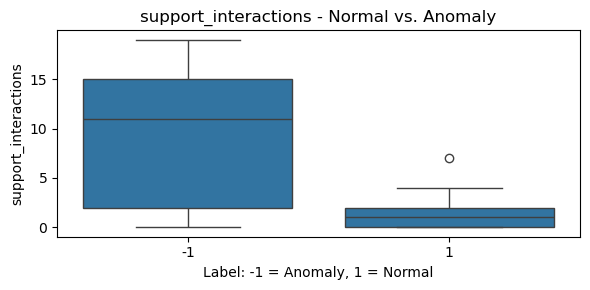

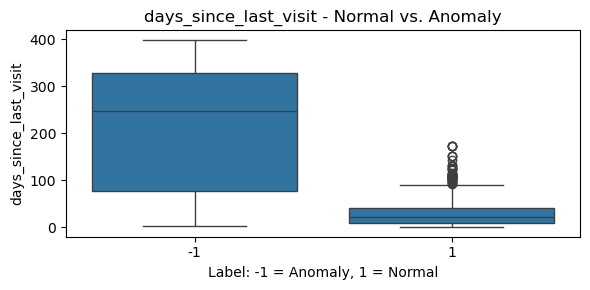

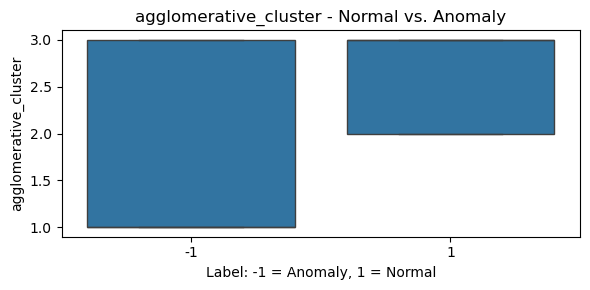

In [10]:

temp_df = customer_behavior.copy()
temp_df['anomaly_label'] = labels

for col in customer_behavior.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=temp_df, x='anomaly_label', y=col)
    plt.title(f'{col} - Normal vs. Anomaly')
    plt.xlabel('Label: -1 = Anomaly, 1 = Normal')
    plt.tight_layout()
    plt.show()

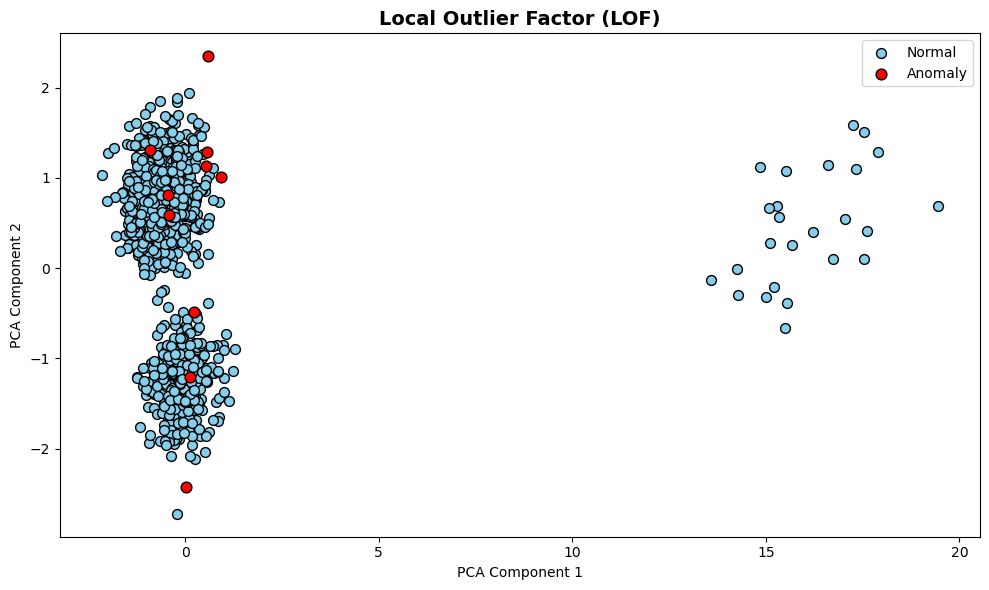

In [11]:
from sklearn.neighbors import LocalOutlierFactor

X_scaled = StandardScaler().fit_transform(customer_behavior)

lof = LocalOutlierFactor(n_neighbors=4, contamination='auto')
labels = lof.fit_predict(X_scaled)

X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1],
            c='skyblue', edgecolor='k', s=50, label='Normal')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1],
            c='red', edgecolor='k', s=60, label='Anomaly')
plt.title('Local Outlier Factor (LOF)', fontsize=14, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


In [12]:
from sklearn.manifold import trustworthiness

X_scaled = StandardScaler().fit_transform(customer_behavior)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Evaluate trustworthiness
trust = trustworthiness(X_scaled, X_pca, n_neighbors=5)
print(f"Trustworthiness: {trust:.4f}")

Trustworthiness: 0.8013


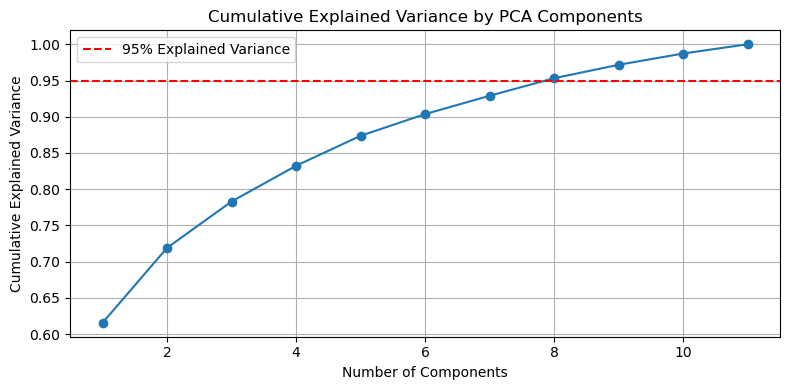

In [13]:
pca = PCA().fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import pairwise_distances

X_scaled = StandardScaler().fit_transform(customer_behavior)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

D_original = pairwise_distances(X_scaled, metric='euclidean')
D_pca = pairwise_distances(X_pca, metric='euclidean')

epsilon = 1e-9
D_original = np.where(D_original == 0, epsilon, D_original)

# Compute Sammon’s stress error
numerator = ((D_original - D_pca) ** 2 / D_original).sum()
denominator = D_original.sum()
sammon_stress = numerator / denominator

print(f"Sammon's Stress Score: {sammon_stress:.4f}")


Sammon's Stress Score: 0.2160


In [15]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Silhouette score
silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Coefficient: {silhouette:.4f}")

Silhouette Coefficient: 0.2615


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the data
X_scaled = StandardScaler().fit_transform(customer_behavior)

# Fit Isolation Forest and get anomaly scores
iso = IsolationForest(contamination='auto', random_state=42)
iso.fit(X_scaled)

# Note: decision_function returns anomaly scores (the higher, the more normal)
scores = -iso.decision_function(X_scaled)  # Flip sign: higher = more anomalous


In [17]:
from sklearn.metrics import calinski_harabasz_score

# CH index
ch_index = calinski_harabasz_score(X_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 1100.52


In [18]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 1.1593


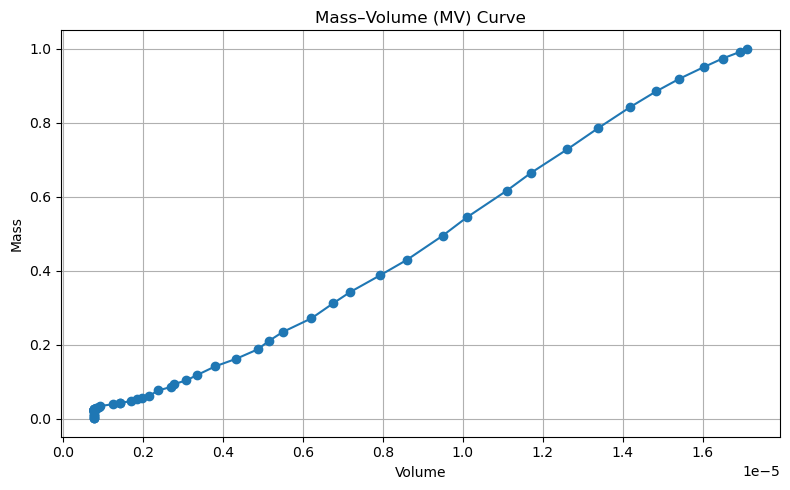

In [19]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Estimate data density using Kernel Density Estimation (KDE)
def estimate_volume(X, scores, thresholds):
    kde = GridSearchCV(KernelDensity(kernel='gaussian'),
                       {'bandwidth': np.linspace(0.1, 1.5, 20)},
                       cv=3).fit(X)
    kde = kde.best_estimator_

    volumes = []
    masses = []

    for t in thresholds:
        mask = scores >= t
        mass = mask.mean()
        if mass == 0:
            continue
        selected_points = X[mask]
        log_density = kde.score_samples(selected_points)
        volume = np.exp(log_density).mean()
        masses.append(mass)
        volumes.append(volume)

    return np.array(masses), np.array(volumes)

thresholds = np.linspace(np.min(scores), np.max(scores), 100)
mass, volume = estimate_volume(X_scaled, scores, thresholds)

plt.figure(figsize=(8, 5))
plt.plot(volume, mass, marker='o')
plt.xlabel('Volume')
plt.ylabel('Mass')
plt.title('Mass–Volume (MV) Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


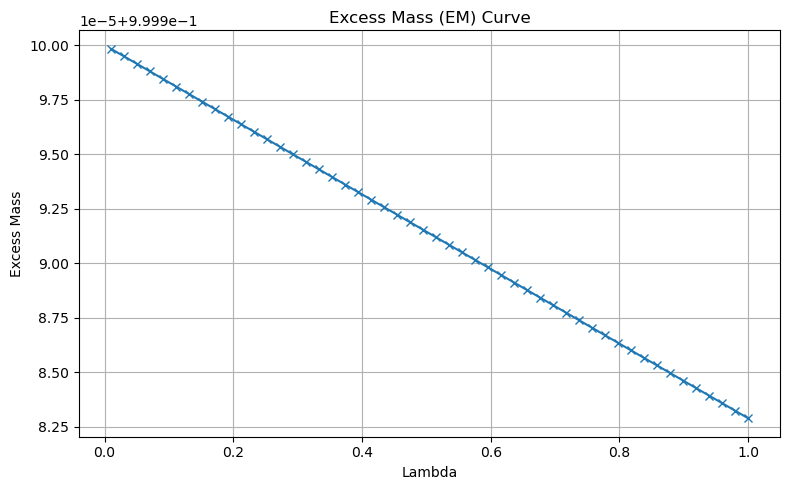

In [20]:
def compute_excess_mass(masses, volumes, lambdas):
    em_values = []
    for lam in lambdas:
        em = np.max(masses - lam * volumes)
        em_values.append(em)
    return np.array(em_values)

# Define a grid of lambda values
lambdas = np.linspace(0.01, 1.0, 50)

# Compute EM curve
em_curve = compute_excess_mass(mass, volume, lambdas)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lambdas, em_curve, marker='x')
plt.xlabel('Lambda')
plt.ylabel('Excess Mass')
plt.title('Excess Mass (EM) Curve')
plt.grid(True)
plt.tight_layout()
plt.show()
